In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df_sales=pd.read_csv("C:/Users/vineela/Desktop/IBM/bigdatamart_Test.csv")
df_sales1=pd.read_csv("C:/Users/vineela/Desktop/IBM/bigdatamart_Train.csv")

In [4]:
databg = pd.concat([df_sales,df_sales1],ignore_index=True)
databg.shape

(14204, 12)

In [5]:
databg

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [16]:
databg.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
databg.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [18]:
databg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [56]:
#Extracting the unique values of each columns

for i in databg.columns:
    print(i," : distinct_value")
    print(databg[i].nunique(), ":No of unique values")
    print(databg[i].unique())
    print("-"*50)
    print("")

Item_Identifier  : distinct_value
1559 :No of unique values
['FDW58' 'FDW14' 'NCN55' ... 'FDL10' 'FDX04' 'FDU19']
--------------------------------------------------

Item_Type_Combined  : distinct_value
3 :No of unique values
['FD' 'NC' 'DR']
--------------------------------------------------

Item_Type  : distinct_value
16 :No of unique values
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
--------------------------------------------------

Item_Fat_Content  : distinct_value
5 :No of unique values
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
--------------------------------------------------

Item_Weight  : distinct_value
416 :No of unique values
[20.75        8.3        14.6         7.315      12.79285423  9.8
 19.35        6.305       5.985      16.6         6.59        4.785
 16.75        6.135      19.85       17.85    

In [20]:
#We can see that we have some data missing

round(100*(databg.isnull().sum())/len(databg), 2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.27
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales            40.00
dtype: float64

In [57]:
databg.describe(include='all')

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,14204,14204,14204,14204.000000,14204.000000,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,3,16,5,NaN,NaN,NaN,10,NaN,3,3,4,NaN
top,DRH11,FD,Fruits and Vegetables,Low Fat,NaN,NaN,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,10201,2013,8485,NaN,NaN,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,NaN,NaN,NaN,12.792854,0.065953,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,NaN,NaN,NaN,4.234226,0.051459,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,NaN,NaN,NaN,4.555000,0.000000,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,NaN,NaN,NaN,9.300000,0.027036,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,NaN,NaN,NaN,12.792854,0.054021,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,NaN,NaN,NaN,16.000000,0.094037,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [23]:
databg.count()

Item_Identifier              14204
Item_Weight                  11765
Item_Fat_Content             14204
Item_Visibility              14204
Item_Type                    14204
Item_MRP                     14204
Outlet_Identifier            14204
Outlet_Establishment_Year    14204
Outlet_Size                  10188
Outlet_Location_Type         14204
Outlet_Type                  14204
Item_Outlet_Sales             8523
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286E1DFA308>,
      dtype=object)

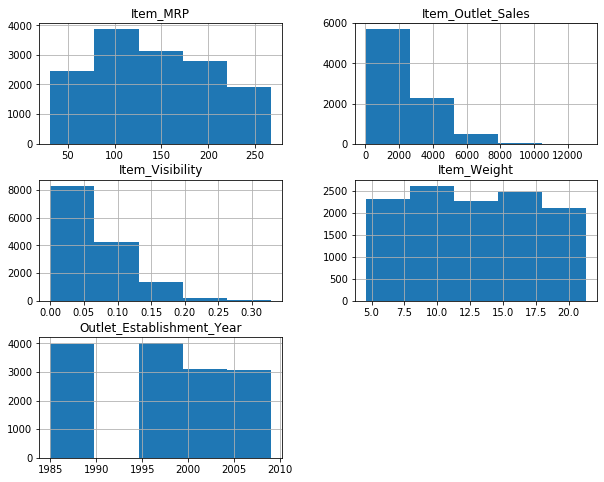

In [24]:
databg.hist(figsize=(10,8),bins=5)

In [58]:
#Filling the mssing data in Item_weight with mean
databg.fillna(databg.mean(), inplace=True)
databg.head(20)

C:\Users\vineela\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,FD,Snack Foods,Low Fat,20.750000,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,2181.288914
1,FDW14,FD,Dairy,reg,8.300000,0.038428,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,2181.288914
2,NCN55,NC,Others,Low Fat,14.600000,0.099575,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,2181.288914
3,FDQ58,FD,Snack Foods,Low Fat,7.315000,0.015388,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2181.288914
4,FDY38,FD,Dairy,Regular,12.792854,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,2181.288914
5,FDH56,FD,Fruits and Vegetables,Regular,9.800000,0.063817,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914
6,FDL48,FD,Baking Goods,Regular,19.350000,0.082602,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914
7,FDC48,FD,Baking Goods,Low Fat,12.792854,0.015782,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,2181.288914
8,FDN33,FD,Snack Foods,Regular,6.305000,0.123365,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2181.288914
9,FDA36,FD,Baking Goods,Low Fat,5.985000,0.005698,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1,2181.288914


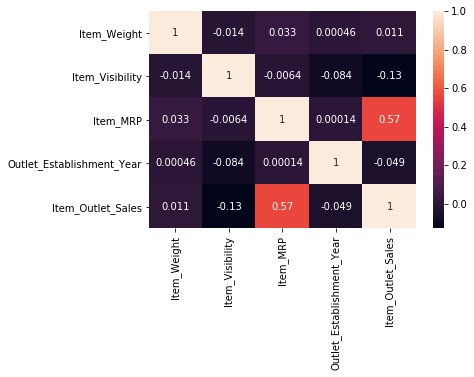

In [29]:

databg.corr()
import seaborn as sns
sns.heatmap(databg.corr(),annot=True)

In [32]:
'''

We saw that in Item_identifier 1st 2 character's are common and other characters describes about the product

So we can extract those characters to simplify our dataset

'''

databg['Item_Type_Combined'] = databg['Item_Identifier'].apply(lambda x: x[0:2])
databg['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [33]:
# Rearranging the Columns 

## To get the better view of data

columns = ['Item_Identifier', 'Item_Type_Combined','Item_Type', 'Item_Fat_Content', 'Item_Weight', 'Item_Visibility',
        'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
databg = databg[columns]
databg.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,FD,Snack Foods,Low Fat,20.750000,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,FD,Dairy,reg,8.300000,0.038428,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,NC,Others,Low Fat,14.600000,0.099575,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,FD,Snack Foods,Low Fat,7.315000,0.015388,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,FD,Dairy,Regular,12.792854,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [64]:
databg.pivot_table(values="Item_Outlet_Sales",index=['Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Type_Combined Item_Type                               
DR                 Dairy                       4.393129e+05
                   Hard Drinks                 7.806242e+05
                   Soft Drinks                 1.505840e+06
FD                 Baking Goods                2.220930e+06
                   Breads                      9.131499e+05
                   Breakfast                   3.980769e+05
                   Canned                      2.393012e+06
                   Dairy                       2.073586e+06
                   Frozen Foods                3.069069e+06
                   Fruits and Vegetables       4.523646e+06
                   Meat                        1.595946e+06
                   Seafood                     2.034004e+05
                   Snack Foods                 4.453823e+06
                   Starchy Foods               6.153372e+05
NC                 Health and Hygiene          1.782476e+06
                   Household                   3.447156e+06
                   Others                      5.676407e+05

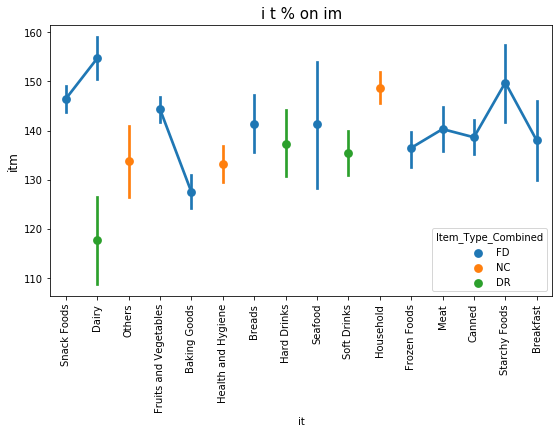

In [66]:
plt.figure(figsize=(9,5))
g1 = sns.pointplot(x='Item_Type', y='Item_MRP', 
                   data=databg, hue='Item_Type_Combined')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("i t % on im", fontsize=15)
g1.set_xlabel("it")
g1.set_ylabel("itm", fontsize=12)
plt.show()

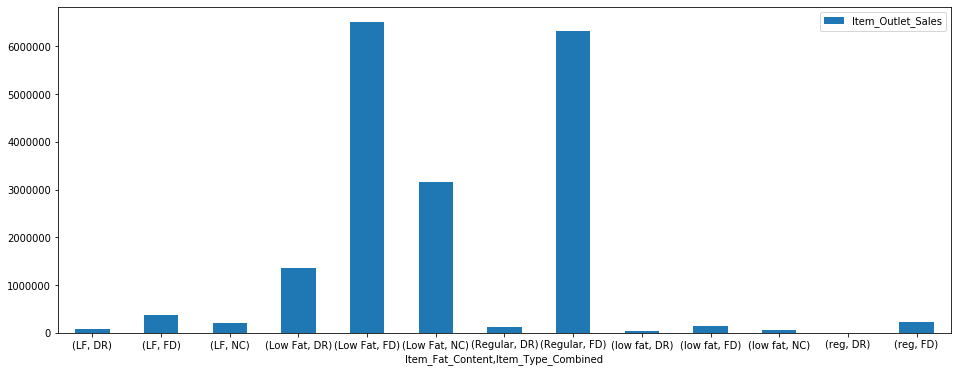

In [42]:
plot_item = databg.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined'],aggfunc='sum')
plot_item.plot(kind='bar',figsize = (16,6))
plt.xticks(rotation=0)
plt.show()

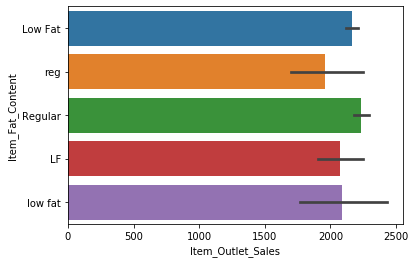

In [44]:
sns.barplot(x='Item_Outlet_Sales',y='Item_Fat_Content',data=databg)
plt.show()

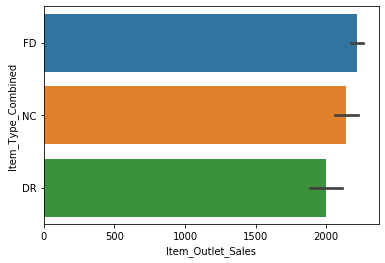

In [45]:
sns.barplot(x='Item_Outlet_Sales',y='Item_Type_Combined',data=databg)
plt.show()

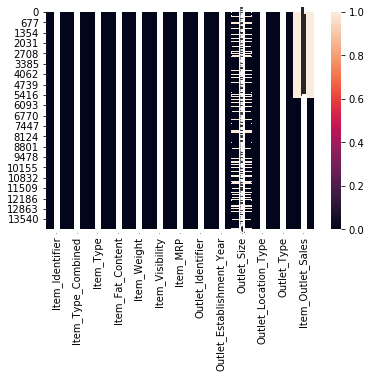

In [50]:
sns.heatmap(databg.isnull(),annot=True)

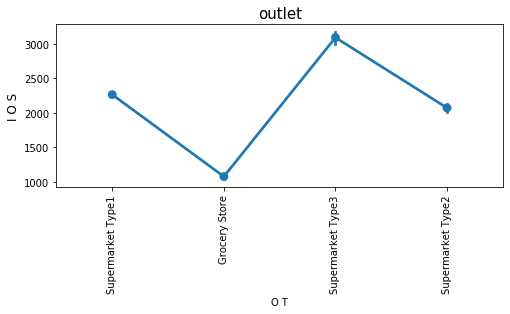

In [61]:
plt.figure(figsize=(8,3))
g1 = sns.pointplot(x='Outlet_Type', y='Item_Outlet_Sales', 
                   data=databg)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("outlet", fontsize=15)
g1.set_xlabel("O T")
g1.set_ylabel("I O S", fontsize=12)
plt.show()

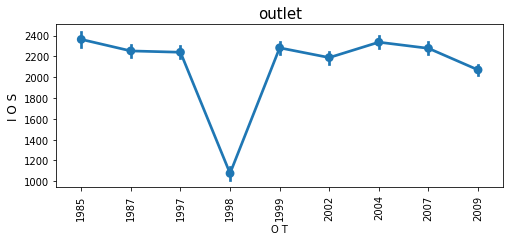

In [62]:
plt.figure(figsize=(8,3))
g1 = sns.pointplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', 
                   data=databg)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("outlet", fontsize=15)
g1.set_xlabel("O T")
g1.set_ylabel("I O S", fontsize=12)
plt.show()

In [10]:
databg.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [23]:
databg.dropna(axis=0,inplace=True)

In [24]:
x = databg.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size',
'Outlet_Location_Type','Outlet_Type'], axis=1)
y = databg['Item_Outlet_Sales']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc=scaler.fit_transform(x,y)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y, train_size=0.8, random_state=20)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random_state:',r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state

r2_score corresponding to random_state: 42 is: 1.0
r2_score corresponding to random_state: 43 is: 1.0
r2_score corresponding to random_state: 44 is: 1.0
r2_score corresponding to random_state: 45 is: 1.0
r2_score corresponding to random_state: 46 is: 1.0
r2_score corresponding to random_state: 47 is: 1.0
r2_score corresponding to random_state: 48 is: 1.0
r2_score corresponding to random_state: 49 is: 1.0
r2_score corresponding to random_state: 50 is: 1.0
r2_score corresponding to random_state: 51 is: 1.0
r2_score corresponding to random_state: 52 is: 1.0
r2_score corresponding to random_state: 53 is: 1.0
r2_score corresponding to random_state: 54 is: 1.0
r2_score corresponding to random_state: 55 is: 1.0
r2_score corresponding to random_state: 56 is: 1.0
r2_score corresponding to random_state: 57 is: 1.0
r2_score corresponding to random_state: 58 is: 1.0
r2_score corresponding to random_state: 59 is: 1.0
r2_score corresponding to random_state: 60 is: 1.0
r2_score corresponding to rando

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

1.0

In [29]:
print('r2 scores:',r2_score(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 scores: 1.0
RMSE is : 8.716178574236214e-13
